# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [3]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(Train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Visualizing the data

In [7]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

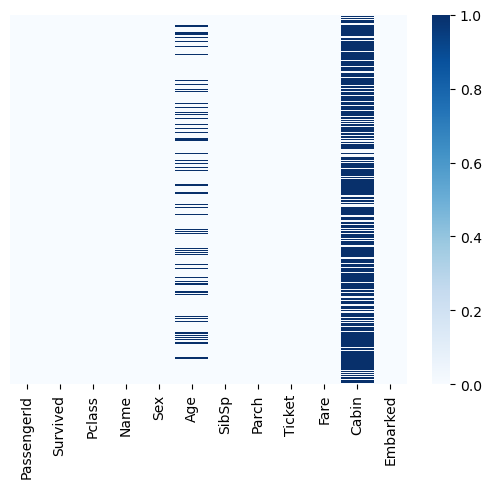

In [8]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=True,cmap='Blues')

<Axes: xlabel='Survived', ylabel='count'>

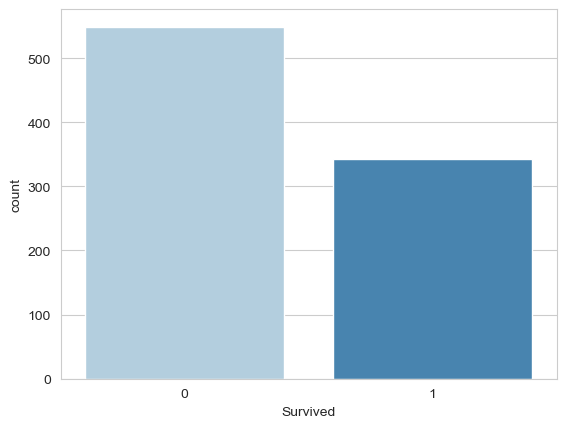

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=Train,palette='Blues')

<Axes: xlabel='Survived', ylabel='count'>

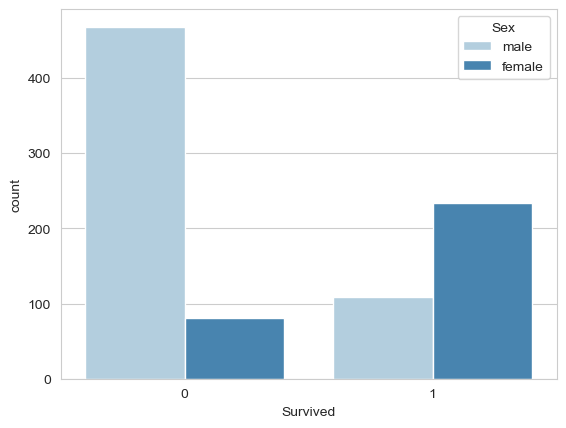

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=Train,palette='Blues')

<Axes: xlabel='Survived', ylabel='count'>

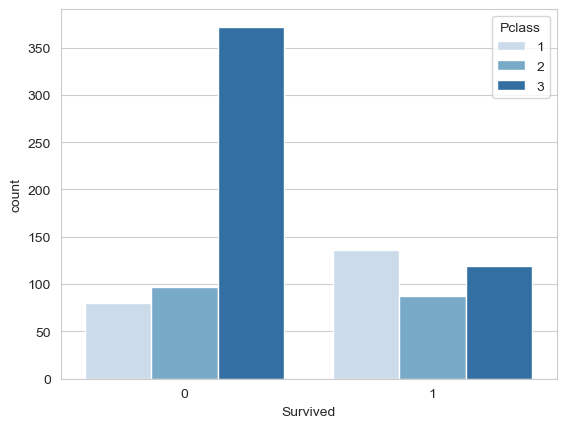

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Train,palette='Blues')

<Axes: >

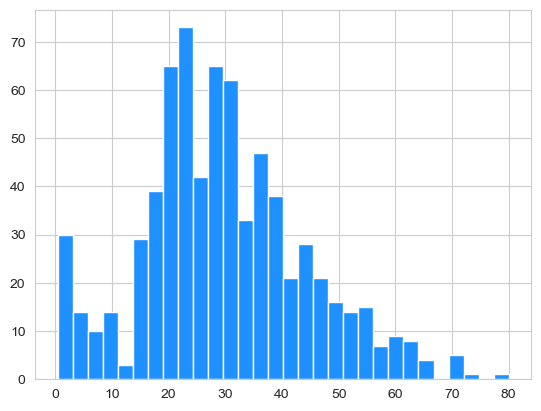

In [12]:
Train['Age'].hist(bins=30,color='Dodgerblue')

<Axes: xlabel='SibSp', ylabel='count'>

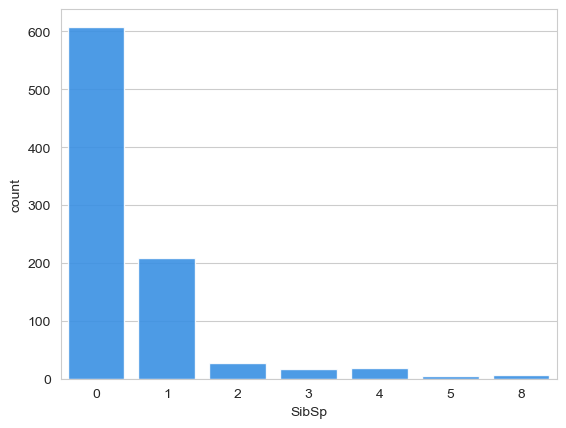

In [13]:
sns.countplot(x='SibSp',data=Train,color="Dodgerblue",alpha=0.9)

<Axes: xlabel='Pclass', ylabel='Age'>

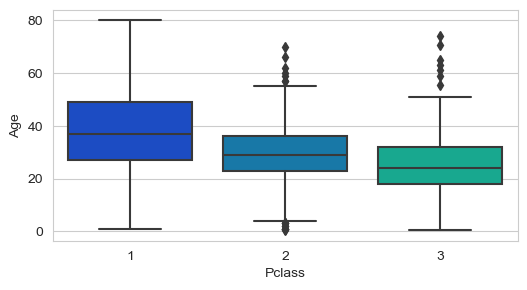

In [14]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Pclass',y='Age',data=Train,palette='winter')

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
Train['Age'] = Train[['Age','Pclass']].apply(impute_age,axis=1)
Test['Age'] = Test[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

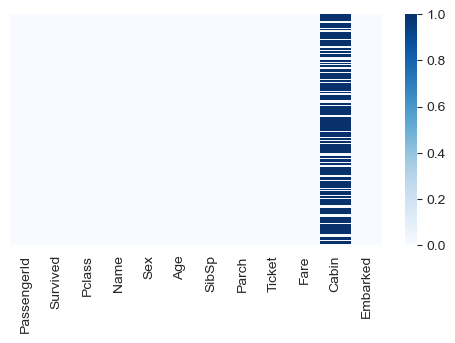

In [17]:
plt.figure(figsize=(6,3))
sns.heatmap(Train.isnull(),yticklabels=False,cbar=True,cmap='Blues')

In [18]:
Train.drop('Cabin',axis=1,inplace=True)
Test.drop('Cabin',axis=1,inplace=True)

In [19]:
# For train data
Sex = pd.get_dummies(Train['Sex'],drop_first=True)
Embark = pd.get_dummies(Train['Embarked'],drop_first=True)
Train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
Train = pd.concat([Train,Sex,Embark],axis=1)

In [20]:
# For test data
Test_sex = pd.get_dummies(Test['Sex'],drop_first=True)
Test_embark = pd.get_dummies(Test['Embarked'],drop_first=True)
Test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
Test = pd.concat([Test,Test_sex,Test_embark],axis=1)

In [21]:
#fill null value of fare column with 0
Test.Fare.fillna(0 ,inplace = True)

# Split the data 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(Train.drop(['Survived','PassengerId'],axis=1), 
                                                    Train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Build Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predictions

In [26]:
predictions = model.predict(X_test)

In [27]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Accuracy score

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



# Test Data

In [30]:
id = Test['PassengerId']
predictions = model.predict(Test.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Save It

In [31]:
result.to_csv('Titanic-Predictions.csv', index = False)